# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     702.6
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           2.06e-38
Time:                        16:02:49   Log-Likelihood:                -6.0264
No. Observations:                  50   AIC:                             20.05
Df Residuals:                      46   BIC:                             27.70
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0160      0.097     51.712      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.52294204  5.02276451  5.47999809  5.86454335  6.1571636   6.35264542
  6.46065517  6.50415086  6.51561024  6.53169474  6.58722616  6.70946549
  6.91363407  7.20041269  7.55582982  7.95355704  8.35923472  8.73611726
  9.05111023  9.28020773  9.41243647  9.45165868  9.41593751  9.33456935
  9.24327048  9.17830903  9.17054618  9.24036578  9.39432535  9.62407868
  9.90774711 10.21351409 10.5048526  10.7465264  10.91037928 10.97996099
 10.95323002 10.84288901 10.67429771 10.48130647 10.30069471 10.16612819
 10.10262779 10.12245866 10.22311512 10.38773228 10.58785694 10.78812235
 10.95205887 11.04808585]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.04276416 10.89278875 10.61981841 10.27321077  9.91793788  9.61867873
  9.4239836   9.35438726  9.39738134  9.51047682]


## Plot comparison

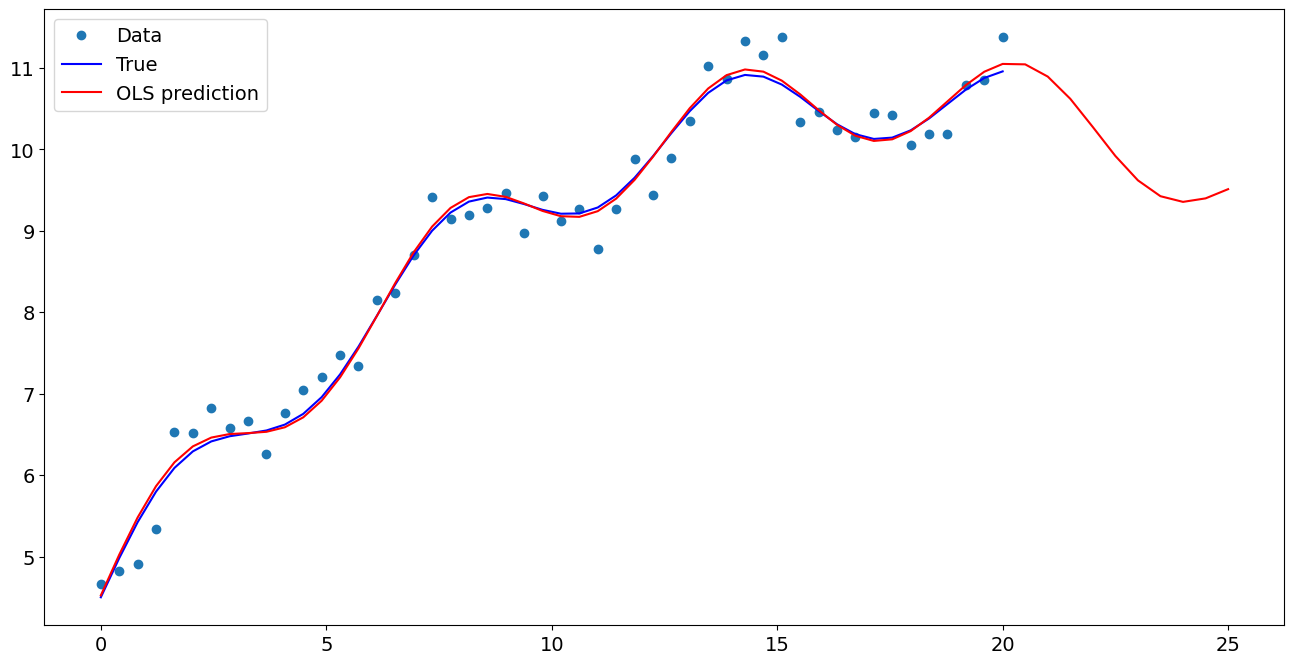

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.016049
x1                  0.498289
np.sin(x1)          0.552292
I((x1 - 5) ** 2)   -0.019724
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.042764
1    10.892789
2    10.619818
3    10.273211
4     9.917938
5     9.618679
6     9.423984
7     9.354387
8     9.397381
9     9.510477
dtype: float64